In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Syed Ali Zar\AppData\Local\Temp\ipykernel_9604\97421923.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#lets create synthetic data points
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

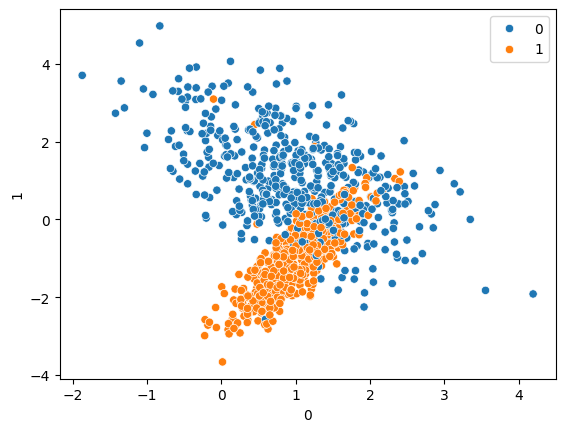

In [3]:
#plot
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [4]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [5]:
#import SVC and fit it
from sklearn.svm import SVC

svc=SVC(kernel='linear')

svc.fit(x_train,y_train)

SVC(kernel='linear')

In [6]:
#prediction on x_test

y_pred=svc.predict(x_test)


In [7]:
#import perfomance metrics
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print("Classification Report: ")
print(report)
print("Confusion Matrix: ")
print(matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       153
           1       0.85      0.86      0.86       147

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Confusion Matrix: 
[[131  22]
 [ 20 127]]


Now we check that if we have non linear relationship then when we apply linear SVC then we dot get good accuracy

In [9]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

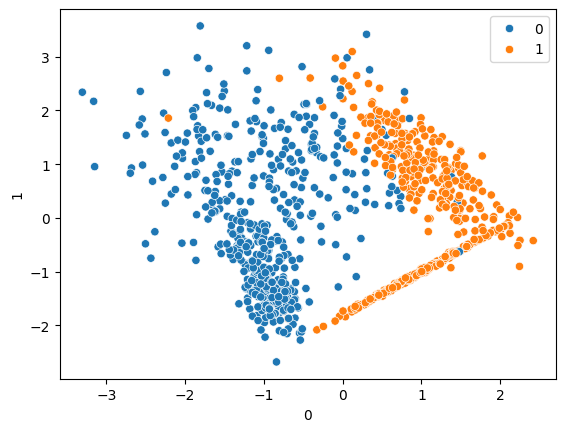

In [10]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')

svc.fit(x_train,y_train)

SVC(kernel='linear')

In [13]:
y_pred=svc.predict(x_test)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print("Classification Report for Linear: ")
print(report)
print("Confusion Matrix for Linear: ")
print(matrix)

Classification Report for Linear: 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       140
           1       0.93      0.96      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix for Linear: 
[[129  11]
 [  7 153]]


Now we use RBF Kernel for this

In [16]:
rbf=SVC(kernel='rbf')

rbf.fit(x_train,y_train)

y_pred=rbf.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print("Classification Report for RBF: ")
print(report)
print("Confusion Matrix for RBF: ")
print(matrix)

Classification Report for RBF: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       140
           1       0.96      0.98      0.97       160

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Confusion Matrix for RBF: 
[[134   6]
 [  3 157]]


Now we check that when we use RBF instead of Linear then our accuracy will increase.

Now we use Polynomial Kernel

In [17]:
polynomial=SVC(kernel='poly')

polynomial.fit(x_train,y_train)

y_pred1=polynomial.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred1)
matrix=confusion_matrix(y_test,y_pred1)
print("Classification Report  for Polynomial: ")
print(report)
print("Confusion Matrix for Polynomial: ")
print(matrix)

Classification Report  for Polynomial: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       140
           1       0.96      0.96      0.96       160

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrix for Polynomial: 
[[134   6]
 [  6 154]]


Polynomial kernel not gives good accuracy so we don't use it.

Now we use Sigmoid Kernel.

In [18]:
sigmoid=SVC(kernel='sigmoid')

sigmoid.fit(x_train,y_train)

y_pred2=sigmoid.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred2)
matrix=confusion_matrix(y_test,y_pred2)
print("Classification Report for Sigmoid: ")
print(report)
print("Confusion Matrix for Sigmoid: ")
print(matrix)

Classification Report for Sigmoid: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       140
           1       0.90      0.93      0.92       160

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix for Sigmoid: 
[[124  16]
 [ 11 149]]


Again we check that Accuracy with Sigmoid is less then accuracy of RBF.

HyperParameter Tuning with SVC

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [20]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [21]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
y_pred3=grid.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred3)
matrix=confusion_matrix(y_test,y_pred3)
print("Classification Report for HyperParameter Tuning: ")
print(report)
print("Confusion Matrix for HyperParameter Tuning: ")
print(matrix)

Classification Report for HyperParameter Tuning: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       140
           1       0.97      0.99      0.98       160

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix for HyperParameter Tuning: 
[[135   5]
 [  1 159]]
